In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [87]:
f=open('train-images.idx3-ubyte','rb')
l=open('train-labels.idx1-ubyte','rb')
o=open('output_train.csv','w')
f.read(16)  #Read 16 Bytes
l.read(8)   #Read 8 Bytes of data
f2=open('t10k-images.idx3-ubyte','rb')
l2=open('t10k-labels.idx1-ubyte','rb')
o2=open('output_test.csv','w')
f2.read(16)
l2.read(8)

b"\x00\x00\x08\x01\x00\x00'\x10"

In [88]:
train_img=[]
test_img=[]
n=1000
for i in range(n):
    img=[ord(l.read(1))]
    for j in range(28*28):
        img.append(ord(f.read(1)))
    train_img.append(img)
for image in train_img:
    o.write(",".join(str(pixel) for pixel in image)+"\n") 
f.close()
l.close()
o.close()
n2=10000
for i in range(10000):
    img=[ord(l2.read(1))]
    for j in range(28*28):
        img.append(ord(f2.read(1)))
    test_img.append(img)  
for image in test_img:
    o2.write(",".join(str(pixel) for pixel in image)+"\n")
f2.close()
l2.close()
o2.close()    

In [89]:
df_train=pd.read_csv('output_train.csv',header=None)
df_test=pd.read_csv('output_test.csv',header=None)
eta=1
epsilon=0.1
W=np.random.random(size=(10,784))
max_epochs=40
errors_train=[]
df2_train=pd.DataFrame(np_utils.to_categorical(df_train[0]))

In [90]:
def step_func(y):
    return np.array(list(map(lambda x: 1 if x>=0 else 0,y)))

In [91]:
def find_errors(df,W):
    df['v']=df.apply(lambda x: np.dot(W,x[1:785].values).argmax(),axis=1)
    return sum(df['v']!=df[0])

In [92]:
for i in range(max_epochs):
    errors_train.append(find_errors(df_train,W))
    print(i)
    for j in range(n):
        #print(j)
        W=W+eta*np.dot(np.expand_dims(df2_train.iloc[j].values-step_func(np.dot(W,df_train.iloc[j][1:785].values)),axis=1),
              np.expand_dims(df_train.iloc[j][1:785],axis=0)) 
W_final=W  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [93]:
errors_train

[918,
 213,
 188,
 105,
 68,
 76,
 76,
 96,
 35,
 52,
 26,
 32,
 45,
 20,
 25,
 26,
 30,
 40,
 16,
 11,
 24,
 3,
 37,
 27,
 6,
 6,
 2,
 12,
 4,
 3,
 4,
 0,
 8,
 3,
 12,
 7,
 5,
 1,
 0,
 1]

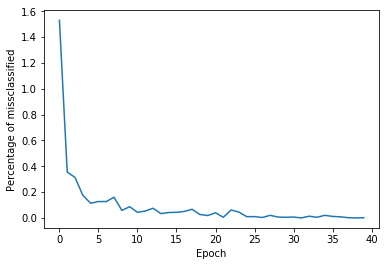

In [94]:
fig,ax=plt.subplots(nrows=1)
ax.plot(range(max_epochs),[x/600 for x in errors_train])
ax.set_xlabel('Epoch')
ax.set_ylabel('Percentage of missclassified')
plt.show()

In [95]:
errors_test=[]
errors_test.append(find_errors(df_test,W_final))
errors_test

[1804]